In [ ]:
# Download slides
!gdown https://drive.google.com/uc?id=1dGB-4cBCco8VWz-87HSAaXgSCFfTonwA

Downloading...
From: https://drive.google.com/uc?id=1dGB-4cBCco8VWz-87HSAaXgSCFfTonwA
To: /content/slides_s12_face_detection.pdf
100% 7.76M/7.76M [00:00<00:00, 16.1MB/s]


# Face Detection

Source: https://maelfabien.github.io/tutorials/face-detection/#

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
!gdown https://drive.google.com/uc?id=10UyWxgSfrTdGia9wsyll-45a6Sciuiun

Downloading...
From: https://drive.google.com/uc?id=10UyWxgSfrTdGia9wsyll-45a6Sciuiun
To: /content/ad_face.png
100% 55.4k/55.4k [00:00<00:00, 64.7MB/s]


In [ ]:
# Load the test image
img = cv2.imread('ad_face.png')
frame_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #opencv face detector expects gray images

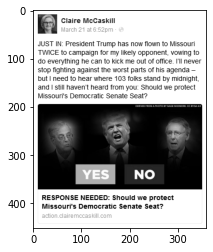

In [ ]:
plt.imshow(gray, cmap='gray')

## Haar Cascade Face Detector in OpenCV

In [ ]:
# make a copy of the image
img_haar = img.copy()

Load the Haar cascade classifiers 

OpenCV provides a training method ( see [Cascade Classifier Training](https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html)) or pretrained models, that can be read using the cv2.CascadeClassifierload method. The pre-*trained* models are located in the data folder in the OpenCV installation or can be found [here](https://github.com/opencv/opencv/tree/3.4/data).

Tip: Use Wget to download a single file from GitHub:
The URL is constructed like this:
`https://raw.githubusercontent.com/user/repository/branch/filename`

In [ ]:
!wget https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml

--2022-10-25 16:54:35--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.03s   

2022-10-25 16:54:35 (27.2 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

Tune parameters according to your own data.

* detectMultiScale(image, scaleFactor, minNeighbors): This is a general function to detect objects, in this case, it'll detect faces since we called in the face cascade. If it finds a face, it returns a list of positions of said face in the form “Rect(x,y,w,h).”, if not, then returns “None”.

* Image: The first input is the grayscale image. So make sure the image is in grayscale.

* scaleFactor: Parameter specifying how much the image size is reduced at each image scale. It compensates a false perception in size that occurs when one face appears to be bigger than the other simply because it is closer to the camera.If the factor is small, the detection could be slow as it is more precise. If the factor is large, the detection could miss some faces. 

* minNeighbors: Parameter specifying how many neighbors each candidate rectangle should have to retain it. The more neighbors it has, the more accurate the detection result could be.

These parameters need to be tuned according to your own data.

Reference: https://docs.opencv.org/2.4.13.2/modules/objdetect/doc/cascade_classification.html#cv2.CascadeClassifier.detectMultiScale

In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.01, 5)
#faces = face_cascade.detectMultiScale(gray, 1.3, 3)

In [ ]:
faces

array([[ 16,  15,  30,  30],
       [266, 235,  51,  51],
       [141, 215,  62,  62],
       [ 44, 242,  49,  49]], dtype=int32)

Then we loop over the list of faces (rectangles) it returned and drew those rectangles using yet another built-in OpenCV rectangle function on our original colored image to see if it found the right faces:

In [ ]:
for (x,y,w,h) in faces: #go over list of faces and draw them as rectangles on original colored image
    img_haar = cv2.rectangle(img_haar,(x,y),(x+w,y+h),(0,0,255),2) 

In [ ]:
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

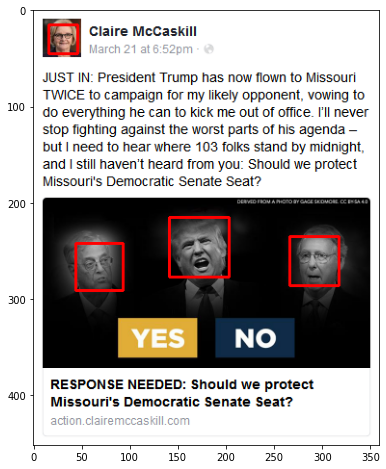

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(convertToRGB(img_haar))

## HoG Face Detector in Dlib


In [ ]:
img_hog = img.copy()

**Take a look at the gradient images**


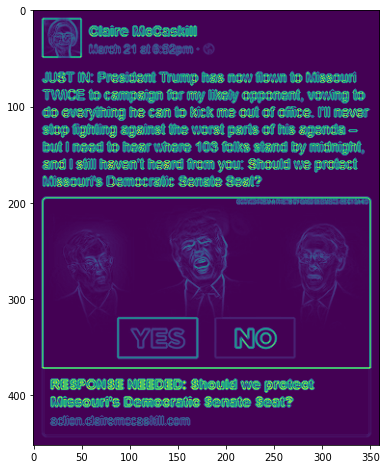

In [ ]:
im = np.float32(gray) / 255.0

# Calculate gradient 
#CV_32F is float - the pixel can have any value between 0-1.0
#𝚔𝚜𝚒𝚣𝚎 = 𝟷, the 3×1 or 1×3 kernel is used
gx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=1)
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

# Plot the picture
plt.figure(figsize=(12,8))
plt.imshow(mag)

**Detect face on an image**

In [ ]:
import dlib
from imutils import face_utils

rectangles[[(259, 236) (313, 290)], [(19, 20) (41, 41)], [(47, 251) (84, 288)], [(146, 224) (200, 278)]]


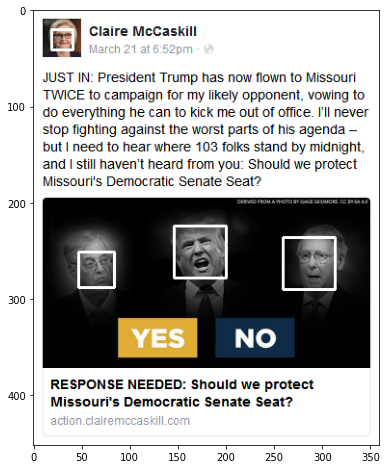

In [ ]:
face_detect = dlib.get_frontal_face_detector()
print(face_detect)
# The 2 in the second argument indicates that we upsample the image
# 2 time.  This will make everything bigger and allow us to detect more
# faces.
rects = face_detect(gray, 2)
print(rects)
for (i, rect) in enumerate(rects):
  (x, y, w, h) = face_utils.rect_to_bb(rect)
  cv2.rectangle(img_hog, (x, y), (x + w, y + h), (255, 255, 255), 2)
    
plt.figure(figsize=(12,8))
plt.imshow(convertToRGB(img_hog))

## Deep Learning based Face Detector in Dlib

> Switch from CPU to GPU
 - Click on `Runtime` and select `Change runtime type`. In Hardware Acceleration, select GPU and hit Save.

In [ ]:
import dlib
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
!gdown https://drive.google.com/uc?id=10UyWxgSfrTdGia9wsyll-45a6Sciuiun
img = cv2.imread('ad_face.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_dp = img.copy()

Downloading...
From: https://drive.google.com/uc?id=10UyWxgSfrTdGia9wsyll-45a6Sciuiun
To: /content/ad_face.png
100% 55.4k/55.4k [00:00<00:00, 64.5MB/s]


Let's download the pre-trained face detection model in Dlib. 

All sorts of pre-trained dlib models can be found in dlib-models repository: https://github.com/davisking/dlib-models

In [ ]:
!wget https://github.com/davisking/dlib-models/raw/master/mmod_human_face_detector.dat.bz2

--2022-10-25 16:58:20--  https://github.com/davisking/dlib-models/raw/master/mmod_human_face_detector.dat.bz2
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/davisking/dlib-models/master/mmod_human_face_detector.dat.bz2 [following]
--2022-10-25 16:58:21--  https://raw.githubusercontent.com/davisking/dlib-models/master/mmod_human_face_detector.dat.bz2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694687 (678K) [application/octet-stream]
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.41K  --.-KB/s    in 0.03s   

2022-10-25 16:58:21 (25.9 MB

In [ ]:
!bunzip2 'mmod_human_face_detector.dat.bz2' # decompressed the .bz2 file

Let's load Dlib's face detection model

In [ ]:
dnnFaceDetector = dlib.cnn_face_detection_model_v1('mmod_human_face_detector.dat')

In [ ]:
rects = dnnFaceDetector(gray, 2) 

In [ ]:
rects

mmod_rectangles[[(144, 224) (193, 273)], [(19, 18) (39, 38)], [(270, 242) (311, 283)], [(42, 246) (83, 287)]]

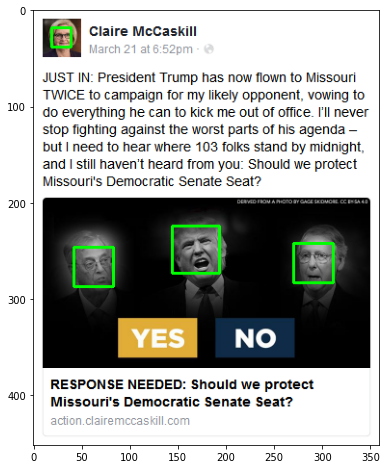

In [ ]:
for (i, rect) in enumerate(rects):
    x1 = rect.rect.left()
    y1 = rect.rect.top()
    x2 = rect.rect.right()
    y2 = rect.rect.bottom()
    # Rectangle around the face
    cv2.rectangle(img_dp, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(img_dp, cv2.COLOR_BGR2RGB))

## Homework

#### 1. Use HoG Face Detector in Dlib to analyze political ads in the creative folder

- Create a dataframe, the first column of which is image file names, the second column is the number of faces detected.

- Save this dataframe as a csv file.




In [1]:
pwd

'/content'

In [2]:
cd '/content'

/content


In [3]:
import pandas as pd
import dlib
from imutils import face_utils
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw
import os
!pip install wget
import wget


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=d557baf33b9e183054221703dfd97d28d0c96cfa81d2a442c1c3cb1cb8b5c376
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [4]:
wget.download('https://drive.google.com/uc?id=1aEpKI-EfdapGhTOor9eQ4LJx1YaLHiHq'),

!wget https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml

--2022-11-01 17:23:41--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.03s   

2022-11-01 17:23:41 (27.9 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [5]:
!unzip creatives.zip

Archive:  creatives.zip
   creating: creatives/
  inflating: __MACOSX/._creatives    
  inflating: creatives/96893679.png  
  inflating: __MACOSX/creatives/._96893679.png  
  inflating: creatives/96856903.png  
  inflating: __MACOSX/creatives/._96856903.png  
  inflating: creatives/96807609.png  
  inflating: __MACOSX/creatives/._96807609.png  
  inflating: creatives/96817350.png  
  inflating: __MACOSX/creatives/._96817350.png  
  inflating: creatives/96887970.png  
  inflating: __MACOSX/creatives/._96887970.png  
  inflating: creatives/96836259.png  
  inflating: __MACOSX/creatives/._96836259.png  
  inflating: creatives/96792914.png  
  inflating: __MACOSX/creatives/._96792914.png  
  inflating: creatives/96936105.png  
  inflating: __MACOSX/creatives/._96936105.png  
  inflating: creatives/96901206.png  
  inflating: __MACOSX/creatives/._96901206.png  
  inflating: creatives/96849900.png  
  inflating: __MACOSX/creatives/._96849900.png  
  inflating: creatives/96761603.png  
  infl

In [6]:
pwd

'/content'

In [7]:
df = pd.DataFrame(columns = ['image file name', 'number of faces detected'])


In [8]:
pwd

'/content'

In [9]:
cd '/content/creatives'


/content/creatives


In [10]:
pwd

'/content/creatives'

In [11]:
#img = cv2.imread('96761603.png')
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #opencv face detector expects gray images

for item in os.listdir('/content/creatives'):
  img  = cv2.imread(item)
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
  

  #img_hog = img.copy() 

  im = np.float32(gray) / 255.0


  # Calculate gradient 
  #CV_32F is float - the pixel can have any value between 0-1.0
  #𝚔𝚜𝚒𝚣𝚎 = 𝟷, the 3×1 or 1×3 kernel is used
  # I dont get why we need the gradient
  #gx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=1)
  #gy = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=1)
  #mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)



  face_detect = dlib.get_frontal_face_detector()

  # The 2 in the second argument indicates that we upsample the image
  # 2 time.  This will make everything bigger and allow us to detect more
  # faces.
  rects = face_detect(gray, 2)




  df = df.append({'image file name' : item, 'number of faces detected' : len(rects)},ignore_index = True)

"""
df = pd.DataFrame([img,len(rects)],columns=['image file name','number of faces detected'],index = image)

for image in file:












  df = pd.DataFrame([img,len(rects)],columns=['image file name','number of faces detected'],index = image)
  df.append(df2)



  # Load the test image

df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'), index=['x', 'y'])

adSales = pd.read_csv("advertising.csv", usecols=['TV', 'Radio', 'Newspaper', 'Sales'])



"""





'\ndf = pd.DataFrame([img,len(rects)],columns=[\'image file name\',\'number of faces detected\'],index = image)\n\nfor image in file:\n\n\n\n\n\n\n\n\n\n\n\n\n  df = pd.DataFrame([img,len(rects)],columns=[\'image file name\',\'number of faces detected\'],index = image)\n  df.append(df2)\n\n\n\n  # Load the test image\n\ndf = pd.DataFrame([[1, 2], [3, 4]], columns=list(\'AB\'), index=[\'x\', \'y\'])\n\nadSales = pd.read_csv("advertising.csv", usecols=[\'TV\', \'Radio\', \'Newspaper\', \'Sales\'])\n\n\n\n'

In [12]:
pwd

'/content/creatives'

In [13]:
os.chdir("..")

In [14]:
pwd

'/content'

In [15]:
compression_opts = dict(method='zip',archive_name='out.csv')

df.to_csv('out.zip', index=False, compression=compression_opts)
